In [1]:
# PROJECT: SALARY PREDICTİON WITH MACHINE LEARNING

In [2]:
# İş Problemi

# Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol
# oyuncularının maaş tahminleri için bir makine öğrenmesi projesi gerçekleştirilebilir mi?

In [3]:
# Veri seti hikayesi

# Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır.
# Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir parçasıdır.
# Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.
# 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan
# 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.

In [4]:
#Değişkenler

# AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
# Hits: 1986-1987 sezonundaki isabet sayısı
# HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
# Runs: 1986-1987 sezonunda takımına kazandırdığı sayı
# RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı
# Walks: Karşı oyuncuya yaptırılan hata sayısı
# Years: Oyuncunun major liginde oynama süresi (sene)
# CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı
# CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
# CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı
# CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı
# CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
# CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
# League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
# Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
# PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
# Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
# Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
# Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
# NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

In [5]:
# Gerekli Kütüphane ve Fonksiyonlar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)  #virgülden sonra 2 basamak göster
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [7]:
import warnings
warnings.filterwarnings("ignore")

#bazı kodlarda güncelleme durumlarından vs kırmızı bi yazı geliyor onları gözardı etmek için böyle yaptık

In [8]:
df = pd.read_csv("OneDrive/hitters.csv")

In [9]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [10]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

In [11]:
def grab_col_names(df, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        df: df
                Değişken isimleri alınmak istenilen df
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [13]:
cat_cols

['League', 'Division', 'NewLeague']

In [14]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [15]:
cat_but_car

[]

In [16]:
# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA)
#############################################

# 1. Outliers (Aykırı Değerler)
# 2. Missing Values (Eksik Değerler)
# 3. Feature Extraction (Özellik Çıkarımı)
# 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
# 5. Feature Scaling (Özellik Ölçeklendirme)

In [17]:
# 1. Outliers (Aykırı Değerler)

In [18]:
def outlier_thresholds(df, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#alt ve üst limitin belirlenmesi

In [19]:
def check_outlier(df, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(df, col_name, q1, q3)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
#alt ve üst limite göre aykırı değer var mı diye bakmak için    

In [20]:
for col in num_cols:
    print(col, check_outlier(df, col))
    
#bütün kolonlara bakıyoruz aykırı değer var mı diye    

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


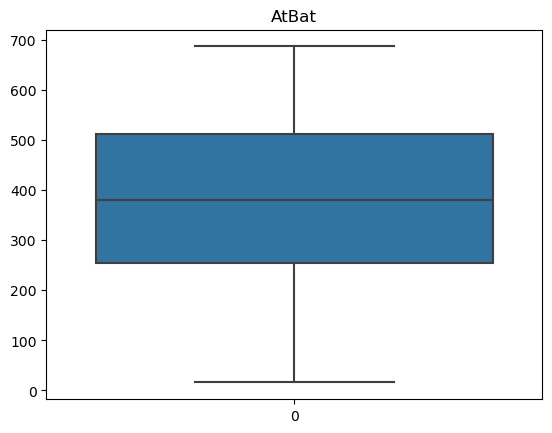

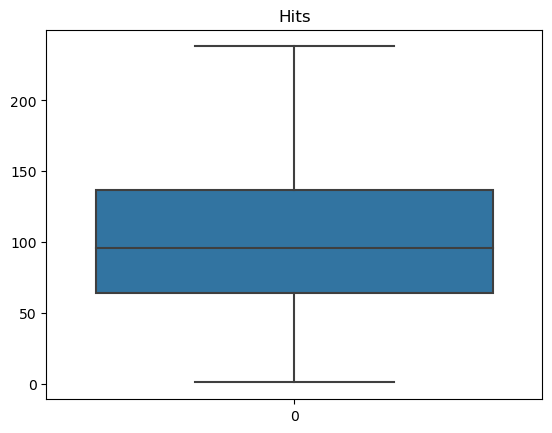

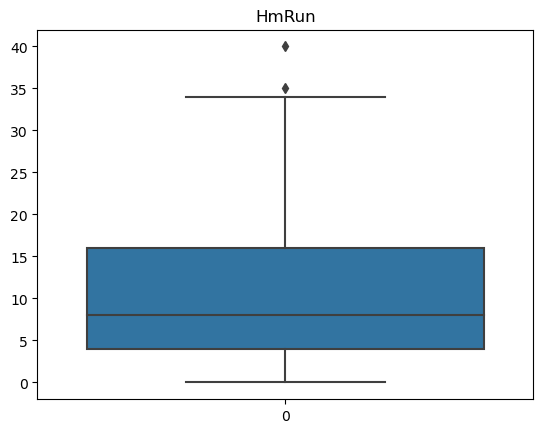

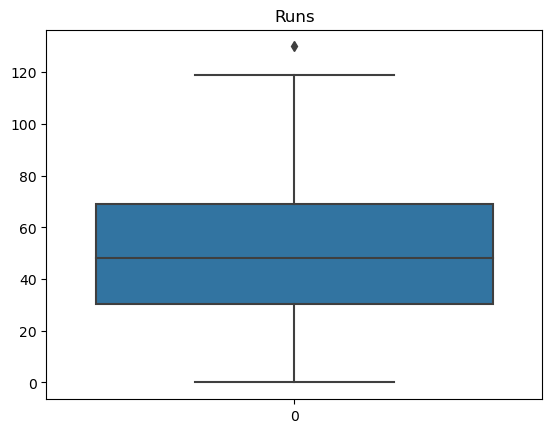

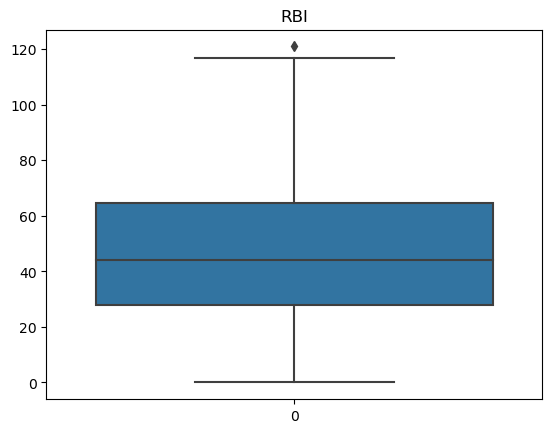

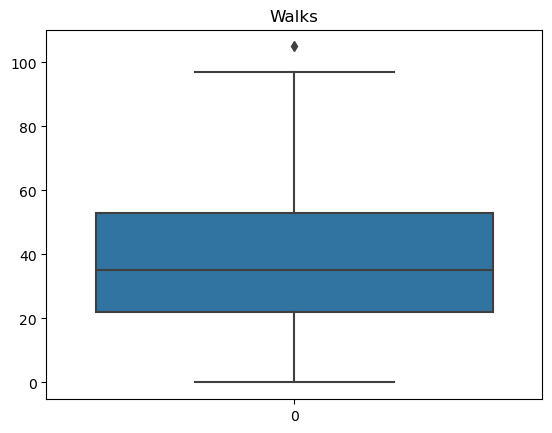

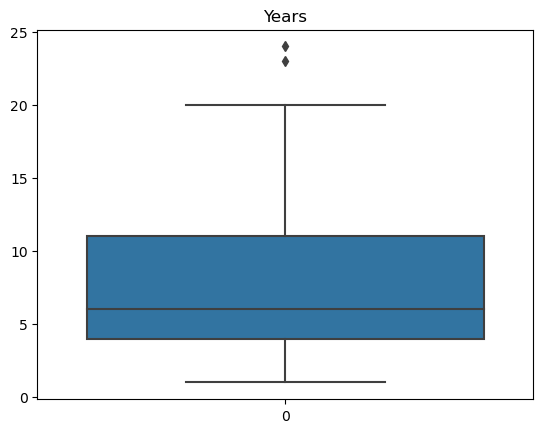

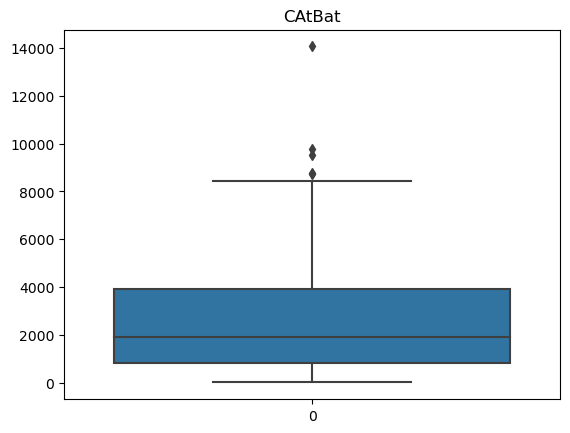

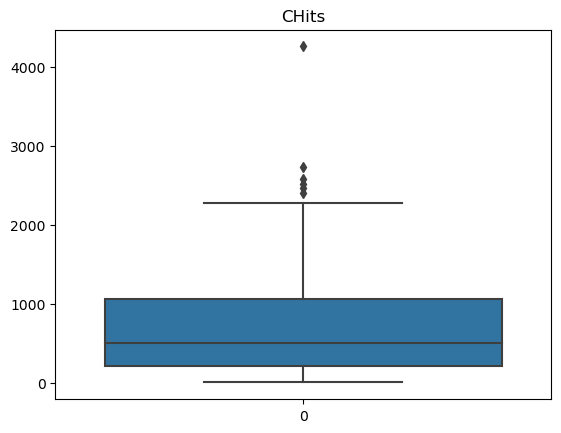

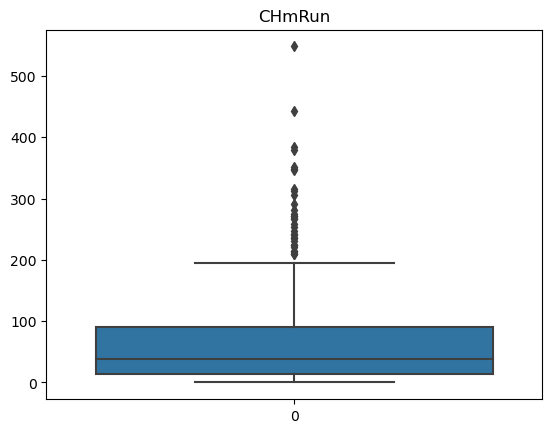

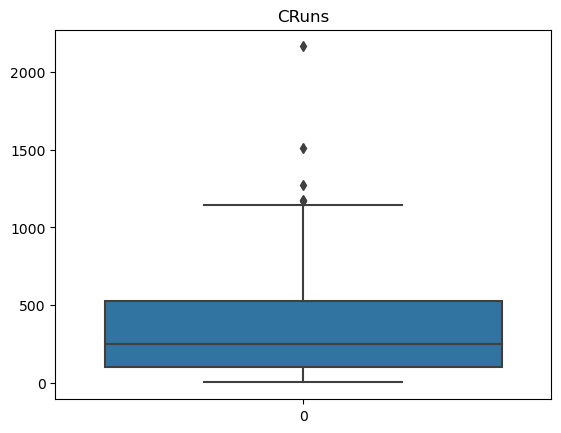

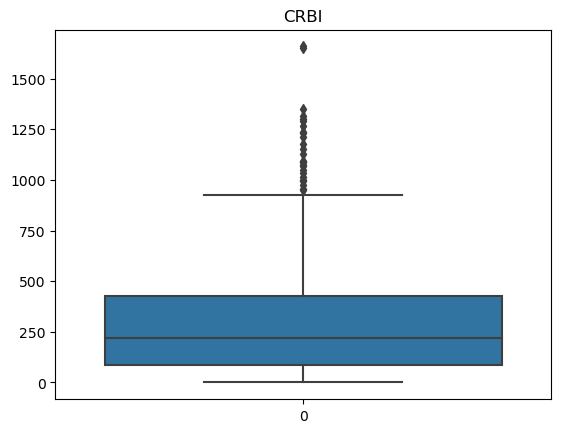

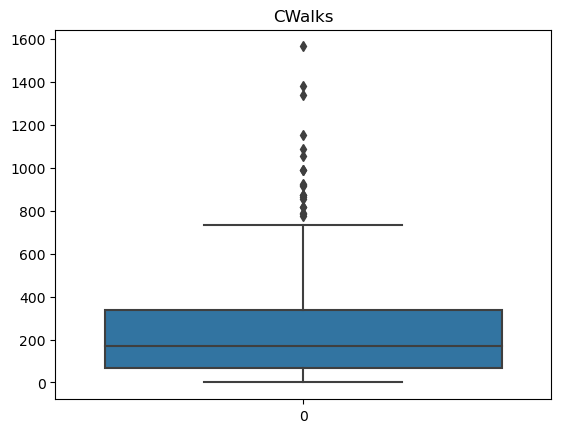

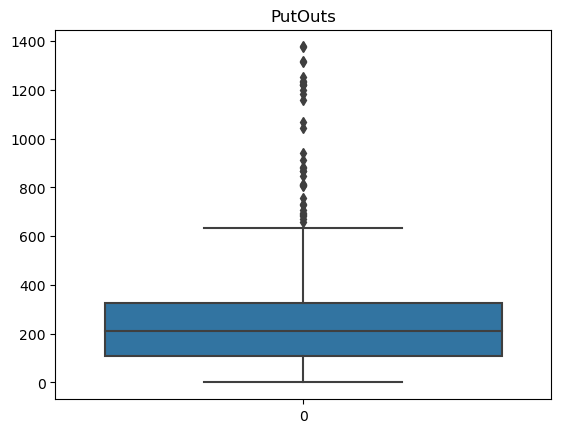

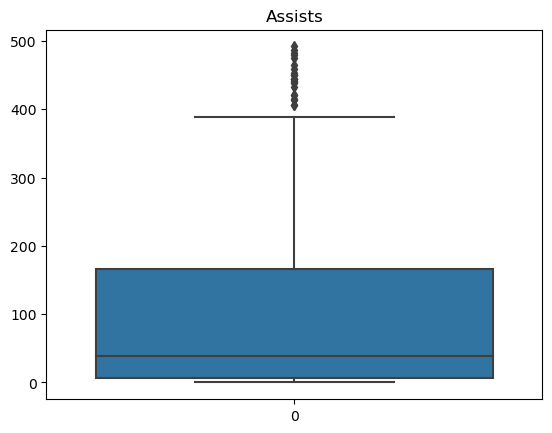

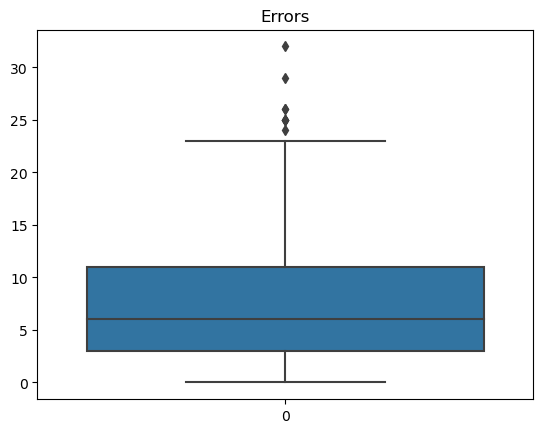

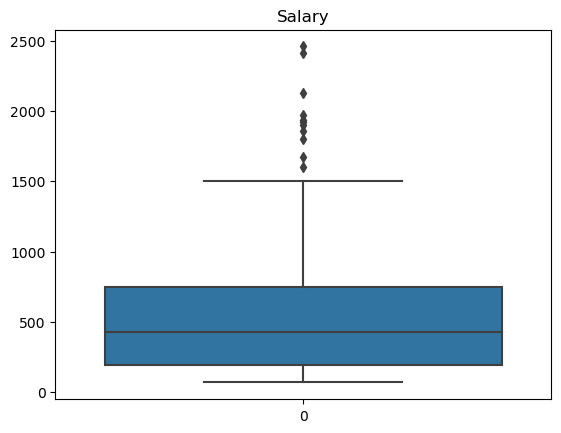

In [21]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show(block=True)
    
#aykırı değer sorgusu grafiği  
#çizgilerin dışındaki noktalar aykırı değerler

In [22]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.1, q3=0.9))
    
#veriye çok hakim olmadığımız için q1 ve q3ü 0.1 ve 0.9a çektik    
#keskin kararlar almak istemedik

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [23]:
def replace_with_thresholds(df, variable, q1, q3):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [24]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        replace_with_thresholds(df, col, q1=0.1, q3=0.9)

In [25]:
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   League  Ratio
A     175  54.35
N     147  45.65
##########################################


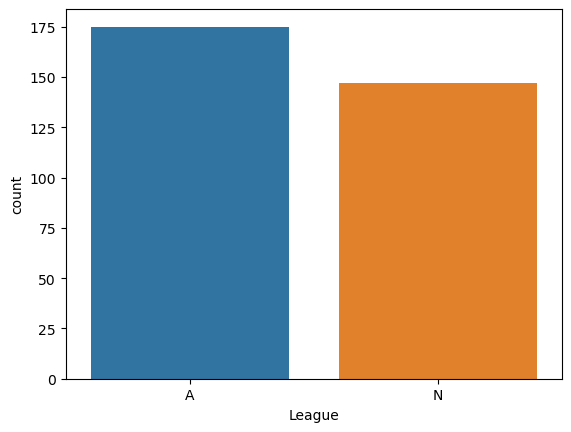

   Division  Ratio
W       165  51.24
E       157  48.76
##########################################


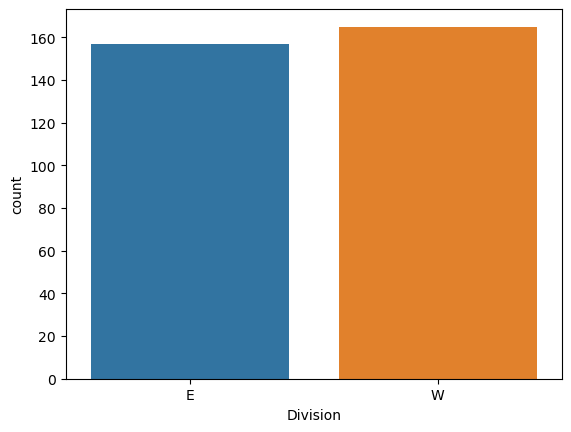

   NewLeague  Ratio
A        176  54.66
N        146  45.34
##########################################


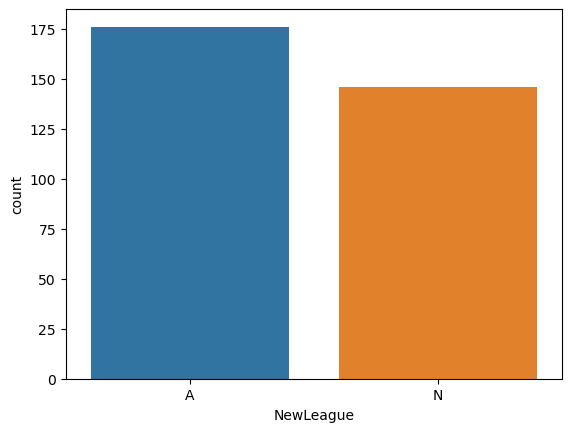

In [27]:
for col in cat_cols:
    cat_summary(df, col, plot=True)
    
#ilki için: A liginde oynayanların oranı %54 N liginde oynayanların oranı %45    

In [28]:
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)

In [29]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


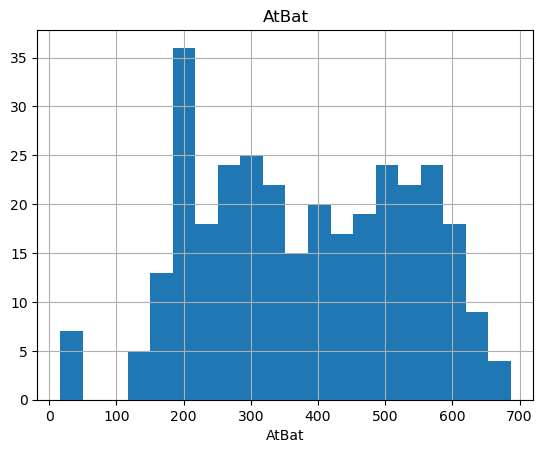

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


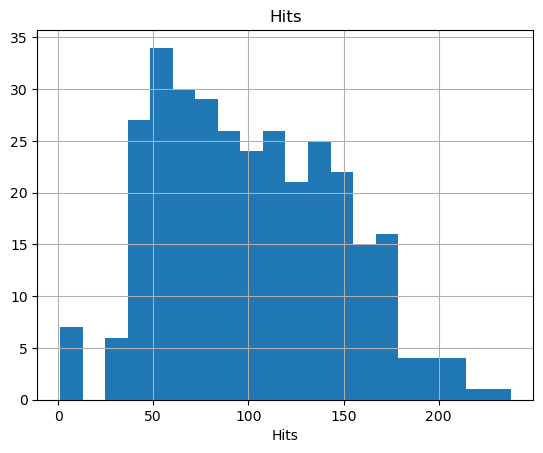

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


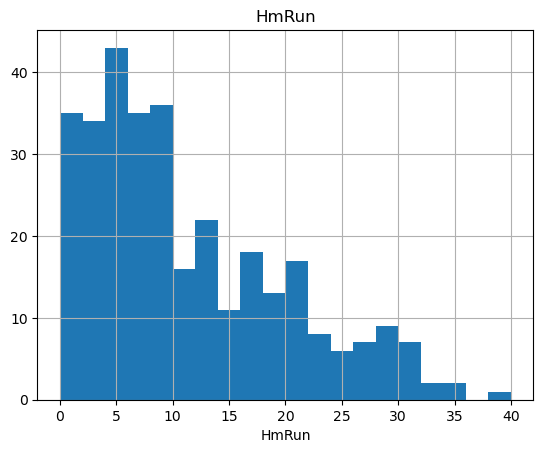

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


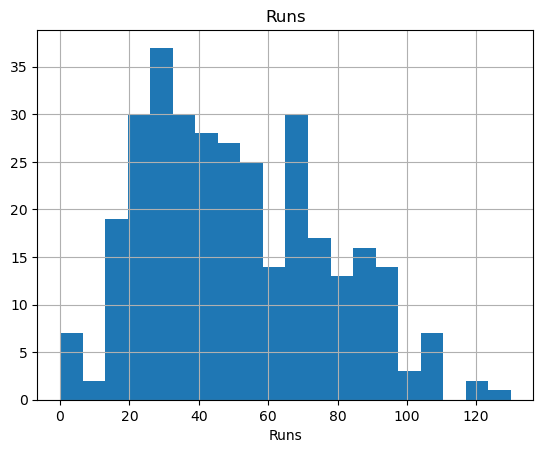

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


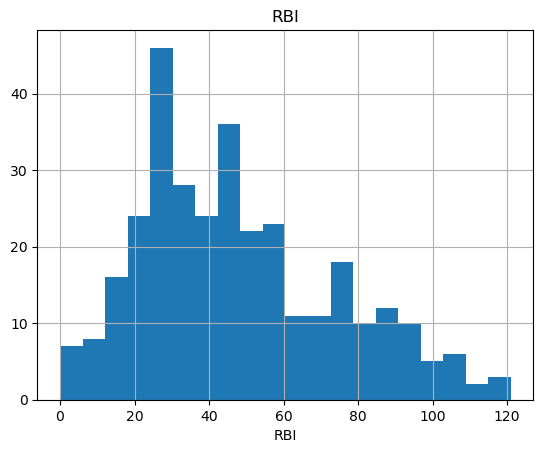

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


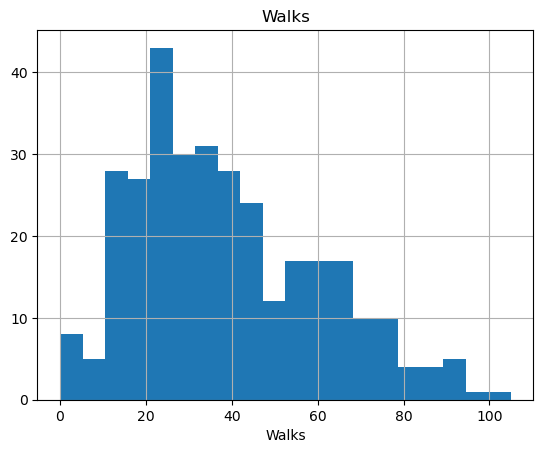

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


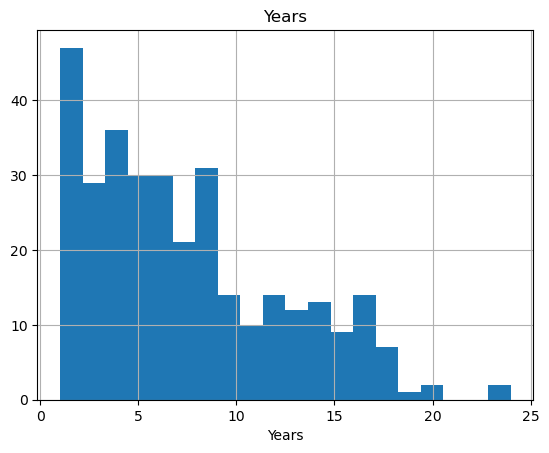

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


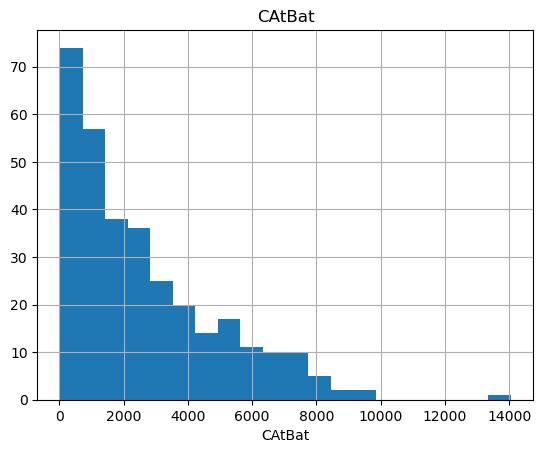

count    322.00
mean     708.44
std      621.52
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2334.62
max     2334.62
Name: CHits, dtype: float64


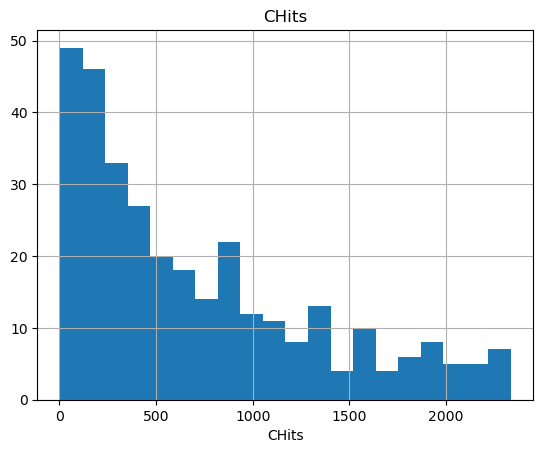

count   322.00
mean     61.46
std      63.35
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     204.00
99%     204.00
max     204.00
Name: CHmRun, dtype: float64


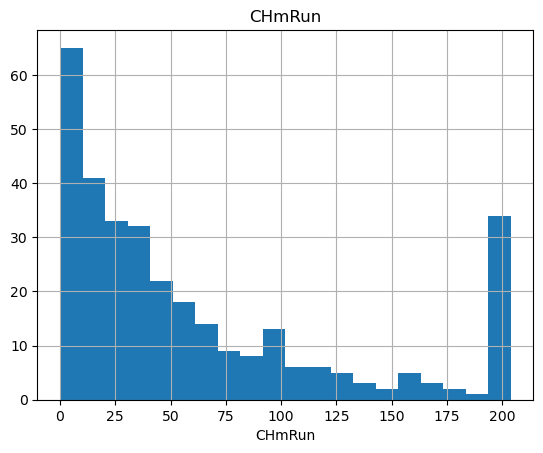

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


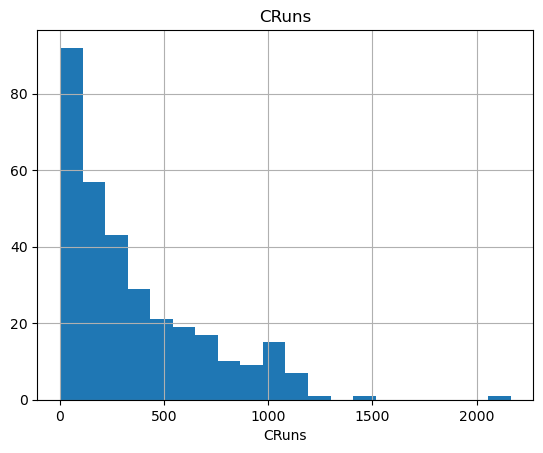

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


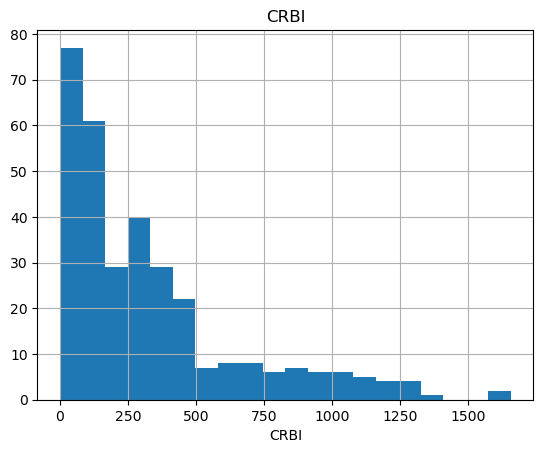

count   322.00
mean    245.20
std     223.42
min       0.00
5%       15.05
10%      30.10
20%      55.00
30%      82.00
40%     117.40
50%     170.50
60%     226.60
70%     300.70
80%     421.00
90%     643.90
95%     747.25
99%     747.25
max     747.25
Name: CWalks, dtype: float64


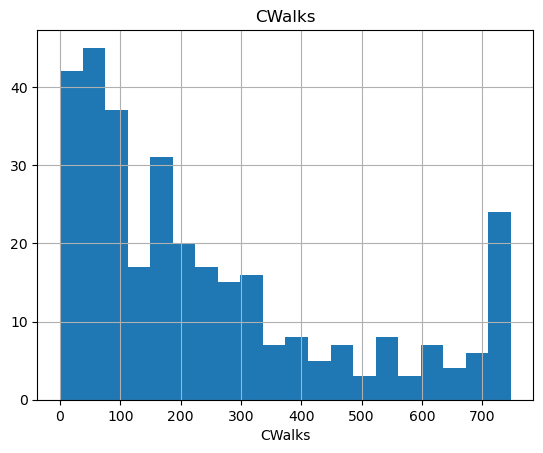

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


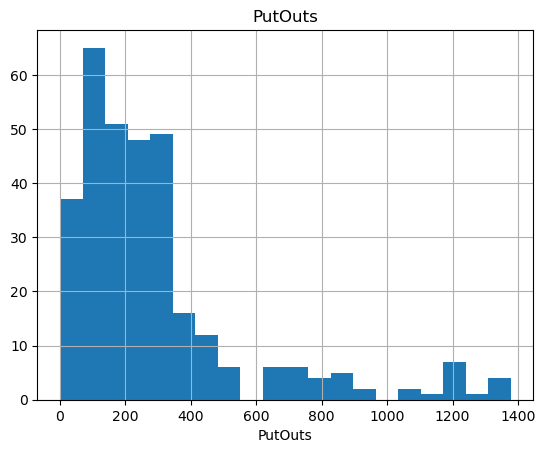

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


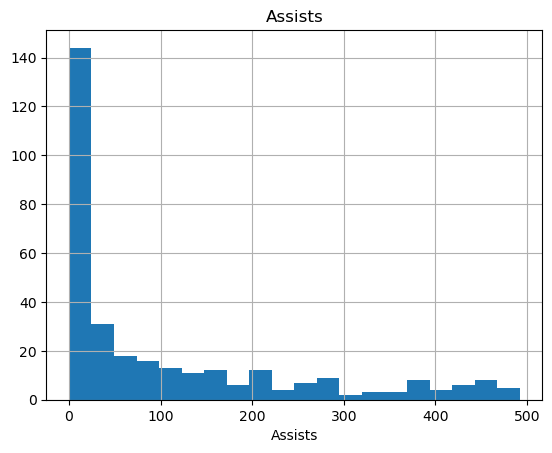

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


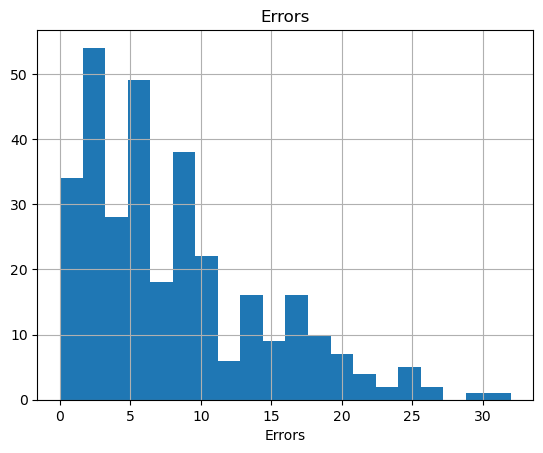

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
99%     2032.89
max     2460.00
Name: Salary, dtype: float64


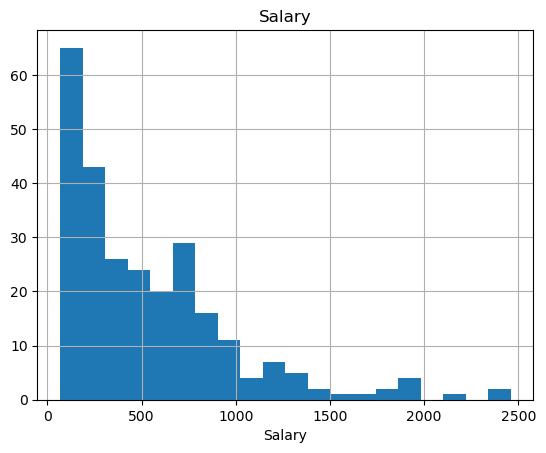

In [30]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [31]:
# 4. Hedef Değişken Analizi (Analysis of Target Variable)

In [32]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [33]:
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




In [34]:
# 5. Korelasyon Analizi (Analysis of Correlation)

In [35]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

In [36]:
#high_correlated_cols(df, plot=True)

#sürümden dolayı hata verdi

#değerler 0dan uzaklaştıkça korelasyon gücü artar işareti negatif ya da pozitif yönlü korelasyon olduğunu söyler

In [37]:
df.isnull().sum()

#targetta yani bağımlı değişkende eksik değer varsa bir şeyle doldurulmaz

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [40]:
# 3. Feature Extraction (Özellik Çıkarımı)

In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [42]:
cat_cols

['League', 'Division', 'NewLeague']

In [43]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [44]:
new_num_cols = [col for col in num_cols if col not in ["Salary", "Years"]]
new_num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [45]:
df[new_num_cols] = df[new_num_cols] + 1

In [46]:
df[new_num_cols]

,AtBat,Hits,HmRun,Runs,RBI,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,316,82,8,25,39,40,3450,836.00,70,322,415,376.00,633,44,11
2,480,131,19,67,73,77,1625,458.00,64,225,267,264.00,881,83,15
3,497,142,21,66,79,38,5629,1576.00,205,829,839,355.00,201,12,4
4,322,88,11,40,43,31,397,102.00,13,49,47,34.00,806,41,5
5,595,170,5,75,52,36,4409,1134.00,20,502,337,195.00,283,422,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,498,128,8,66,49,38,2704,807.00,33,380,312,139.00,326,10,4
318,493,137,6,77,51,95,5512,1512.00,40,898,452,748.25,314,382,21
319,476,127,4,62,44,53,1701,434.00,8,218,94,147.00,38,114,8
320,574,145,10,86,61,79,3199,858.00,98,471,421,333.00,1315,132,13


In [47]:
df.columns = [col.upper() for col in df.columns]

df.columns

Index(['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT',
       'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'LEAGUE', 'DIVISION',
       'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY', 'NEWLEAGUE'],
      dtype='object')

In [48]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [49]:
#byukarıda ütün değişkenlere 1 eklenme nedeni : 

#df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]

#mesela "CRUNS" içinde 0 olan değişkenler olabilir ve bu bölme işlemi sırasında 0a bölünme hatası alırız
#bunun önüne geçmek için 1 eklendi

In [50]:
#Değişkenler üretiyoruz

# RATIO OF VARIABLES

# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

In [51]:
#Annual Averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

In [52]:
# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

In [53]:
# PLAYER LEVEL X DIVISION

df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

In [54]:
# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

In [55]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#sayılar değişti

Observations: 263
Variables: 40
cat_cols: 6
num_cols: 34
cat_but_car: 0
num_but_cat: 0


In [56]:
# Label Encoding

#İki değerimiz varsa genelde bunu 1 ve 0 şeklinde ayırırız

#İkiden fazla olduğunda : One-Hot-Encoding kullanılır

#Ama ikiden fazla olan durumlarda sıralama varsa label encoding kullanılır

In [57]:
binary_cols = [col for col in df.columns if
               df[col].dtype not in [int, float] and df[col].nunique() == 2]

binary_cols

['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [58]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()   #başta import ettik
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [59]:
for col in binary_cols:
    df = label_encoder(df, col)

In [60]:
df[binary_cols].head()

,LEAGUE,DIVISION,NEWLEAGUE
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
5,0,1,0


In [64]:
# Rare Encoding

#önce nadir kolonları yakalamalıyız
#nadir kolonların olması dezavantaj çünkü verinin öğrenebileceği kadar tekrar/örnek yok

In [68]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [69]:
def rare_encoder(dataframe, rare_perc, cat_cols):  #rare_perc = rare yüzdesi
    
    #df kopyalama işlemi yapılma nedeni : orijinal dfimizin yapacağımız işlemden etkilenmesini istemiyoruz
    temp_df = dataframe.copy() 
    
    rare_columns = [col for col in cat_cols if (temp_df[col].value_counts() / len(temp_df) < rare_perc).sum() > 1]

    for col in rare_columns:
        tmp = temp_df[col].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[col] = np.where(temp_df[col].isin(rare_labels), 'Rare', temp_df[col])

    return temp_df

In [70]:
rare_analyser(df,"SALARY", cat_cols)
df = rare_encoder(df, 0.01, cat_cols)

LEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    139   0.53       542.00
1    124   0.47       529.12


DIVISION : 2
   COUNT  RATIO  TARGET_MEAN
0    129   0.49       624.27
1    134   0.51       450.88


NEWLEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    141   0.54       537.11
1    122   0.46       534.55


NEW_YEARS_LEVEL : 4
        COUNT  RATIO  TARGET_MEAN
Expert     65   0.25       755.11
Junior     38   0.14       186.92
Mid        78   0.30       359.34
Senior     82   0.31       691.89


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
Expert-East     32   0.12       809.78
Expert-West     33   0.13       702.10
Junior-East     16   0.06       229.30
Junior-West     22   0.08       156.09
Mid-East        37   0.14       427.91
Mid-West        41   0.16       297.46
Senior-East     44   0.17       798.11
Senior-West     38   0.14       568.90


NEW_PLAYER_PROGRESS : 4
         COUNT  RATIO  TARGET_MEAN
Ascend       8   0.03       558.12
Descend     10   0.04       486.00
Stand

In [71]:
# 6. One-Hot Encoding

#kategorik değişkenleri nümerik olarak ifade etmek istiyoruz çünkü modellerimiz bu şekilde istiyor

In [74]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

ohe_cols

['NEW_YEARS_LEVEL', 'NEW_DIV_CAT', 'NEW_PLAYER_PROGRESS']

In [75]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [76]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

#drop_first : dummie değişken tuzağı = sahip olduğu kolonları 1 eksik kolon sayısıyla yapabiliriz true diyerek bunu aktif ettik
#yapılmasa da olur

In [79]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#veri setimiz büyümüştü

Observations: 263
Variables: 50
cat_cols: 16
num_cols: 34
cat_but_car: 0
num_but_cat: 16


In [78]:
num_cols.remove("SALARY")

#kaldırdık çünkü aşağıda robust scaler yapacağız

In [80]:
#bir modelde eğitmeden önce neden verilerimizi scaler ederiz?

#verilerimizi aynı ölçekte görmek isteriz, verinin yapısı değil ölçeği değişir

#performans odaklı : küçük sayılarla çalışmak modellerin performansını artırır

In [81]:
# 7. Robust-Scaler

#Avantajı : aykırı değerlere dirençli yani aykırı değerlerden çok etkilenmiyor

In [82]:
#from sklearn.preprocessing import RobustScaler diyerek başta import ettik

for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [83]:
# Multiple Linear Regression

In [84]:
X = df.drop("SALARY", axis=1)  #SALARY hariç , bunlar bağımsız değişkenler
y = df[["SALARY"]]             #bağımlı değişken

In [85]:
X

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,...,1,0,0,0,0,0,0,0,0,1
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,...,0,0,0,0,1,0,0,0,1,0
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.12,...,0,0,0,0,0,0,0,0,0,1
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,...,0,1,0,0,0,0,0,0,0,1
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.34,0.34,-0.15,0.33,0.02,0.00,-0.17,0.25,0.34,-0.10,...,0,0,0,1,0,0,0,0,0,1
318,0.32,0.47,-0.31,0.61,0.07,1.68,1.00,1.17,1.18,-0.01,...,0,0,0,0,0,0,0,0,1,0
319,0.25,0.33,-0.46,0.23,-0.10,0.44,0.00,-0.08,-0.10,-0.43,...,0,0,0,0,0,0,1,0,1,0
320,0.66,0.59,0.00,0.84,0.32,1.21,0.33,0.42,0.40,0.74,...,0,0,0,0,0,1,0,0,1,0


In [86]:
y

,SALARY
1,0.09
2,0.10
3,0.13
4,-0.60
5,0.58
...,...
317,0.49
318,0.80
319,-0.07
320,0.96


In [87]:
# Model

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

#from sklearn.model_selection import train_test_split, cross_val_score , başta import ettik

#train_test_split sahip olduğumuz veriyi bizim için parçalıyor , verinin %20sine test %80ine train dedik

#random_state'i farklı sonuçlar almamak için bir sayıya eşitledik

#train_test_split yaparak, aslında holdout yöntemini uyguluyoruz

In [94]:
reg_model = LinearRegression()

#LinearRegression'u da import etmiştik

In [96]:
reg_model.fit(X_train, y_train)

#modelimizi eğittik

LinearRegression()

In [97]:
# b + w*x : burdaki x bizim trainimiz

# sabit (b - bias)
reg_model.intercept_

array([0.34039197])

In [98]:
# coefficients (w - weights)
reg_model.coef_

array([[-0.47414172,  0.8862367 , -0.07322285, -0.20986365,  0.20286963,
         0.01672157, -0.60015683,  0.6019206 , -0.50615578,  0.12668478,
         0.19768322,  0.01949849,  0.16589838, -0.0825178 , -0.07972435,
         0.06497967, -0.10359359,  0.1606949 ,  0.13289604,  0.09503182,
         2.28073825, -2.52050847,  0.02694693, -0.45328398, -0.03427843,
        -0.3422252 , -0.27111471, -0.03181517,  0.10969401,  0.04042507,
        -3.23289168,  1.83407525, -0.22462491,  0.72852203,  0.94470671,
        -0.00597069,  0.08608937, -0.19052637,  0.00603215, -0.08319905,
         0.03047401,  0.05561536, -0.17027263, -0.02025374,  0.03791907,
        -0.03188692, -0.0467501 , -0.08614594, -0.0357677 ]])

In [107]:
#linear regression y_hat = b + w*x

np.inner(X_train.iloc[2, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[2]

SALARY   0.31
Name: 23, dtype: float64

In [108]:
np.inner(X_train.iloc[4, :].values ,reg_model.coef_) + reg_model.intercept_
y_train.iloc[4]

SALARY   -0.32
Name: 297, dtype: float64

In [109]:
# Tahmin

In [110]:
# Tahmin Başarısını Değerlendirme

In [115]:
# Train RMSE
y_pred = reg_model.predict(X_train)

In [116]:
np.sqrt(mean_squared_error(y_train, y_pred))
# smape = mean_absolute_error(y_train, y_pred) / y_train.mean()

0.37434999161102717

In [112]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.7758602292430655

In [121]:
# Test RMSE
y_pred = reg_model.predict(X_test)
y_pred 
#tahmin değerleri

array([[ 0.31438577],
       [ 0.42828662],
       [ 0.54925311],
       [-0.2202928 ],
       [-0.78623287],
       [ 0.77121739],
       [-0.00493713],
       [-0.92200905],
       [ 0.00463924],
       [ 0.02423836],
       [-0.10637671],
       [ 1.87472819],
       [-0.20298281],
       [ 1.39680855],
       [ 1.22818984],
       [-0.18315536],
       [ 0.64484134],
       [ 0.05477292],
       [-0.60923235],
       [ 0.42627385],
       [-0.37312562],
       [-0.01900975],
       [ 0.12001733],
       [-0.12929878],
       [-0.14783601],
       [ 0.27629409],
       [ 1.52939557],
       [ 0.83534773],
       [ 1.14004406],
       [ 0.09871004],
       [ 0.51957813],
       [-0.08040264],
       [ 0.15175786],
       [ 0.0971649 ],
       [ 0.79453551],
       [ 0.04983987],
       [ 0.4834064 ],
       [ 0.42739882],
       [-0.41208057],
       [ 0.39981314],
       [-0.94032174],
       [-0.26262726],
       [ 0.88903695],
       [ 0.11502373],
       [ 0.39795468],
       [ 0

In [120]:
np.sqrt(mean_squared_error(y_test, y_pred))

#gerçek değerlerle arasındaki ilişkiyi görelim

0.6077292161203351

In [117]:
# Test RKARE
reg_model.score(X_test, y_test)

0.49429301097439216

In [118]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

0.5307222926812072